In [1]:
import pandas as pd
from config import *
import matplotlib.pyplot as plt
import numpy as np
from tools import *

In [28]:
tr_log_df = pd.read_pickle(TRAIN_DIR+LOG_PATH)
tr_ad_df = pd.read_pickle(TRAIN_DIR+AD_PATH)
tr_user_df = pd.read_pickle(TRAIN_DIR+USER_PATH)

In [29]:
ts_log_df = pd.read_pickle(TEST_DIR+LOG_PATH)
ts_ad_df = pd.read_pickle(TEST_DIR+AD_PATH)

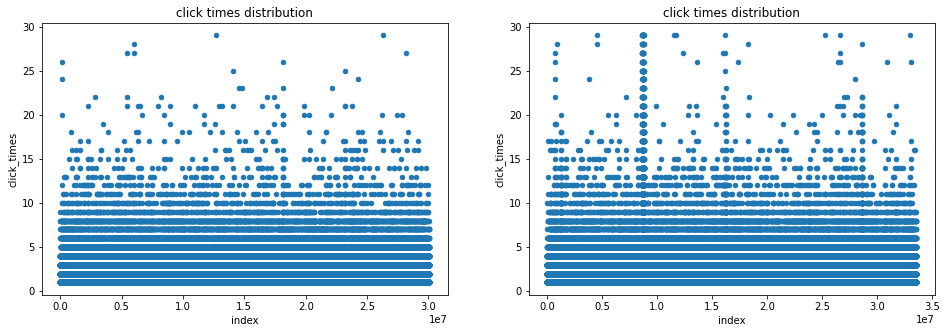

In [30]:
plt.figure(figsize=(16, 5))
ax = plt.subplot(1, 2, 1)
tr_log_df.reset_index().plot(x='index', y='click_times', kind='scatter', ax=ax, title='click times distribution')
ax = plt.subplot(1, 2, 2)
ts_log_df.reset_index().plot(x='index', y='click_times', kind='scatter', ax=ax, title='click times distribution')

In [31]:
tr_log_df = tr_log_df[tr_log_df['click_times']<30]
ts_log_df = ts_log_df[ts_log_df['click_times']<30]

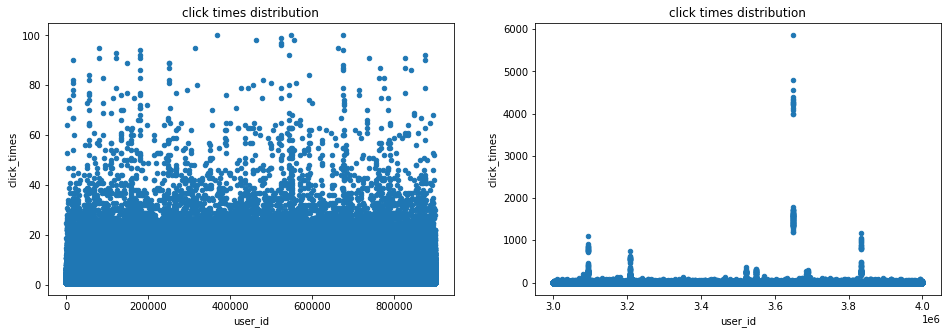

In [32]:
plt.figure(figsize=(16, 5))
ax = plt.subplot(1, 2, 1)
tr_log_df.groupby(['user_id', 'time']).agg({'click_times': np.sum}).reset_index().plot(x='user_id', y='click_times', kind='scatter', ax=ax, title='click times distribution')
ax = plt.subplot(1, 2, 2)
ts_log_df.groupby(['user_id', 'time']).agg({'click_times': np.sum}).reset_index().plot(x='user_id', y='click_times', kind='scatter', ax=ax, title='click times distribution')

In [23]:
temp = tr_log_df.groupby(['user_id', 'time']).agg({'click_times': np.sum}).reset_index()
temp_ts = ts_log_df.groupby(['user_id', 'time']).agg({'click_times': np.sum}).reset_index()

In [24]:
temp = temp[temp['click_times']<=100]
temp_ts = temp_ts[temp_ts['click_times']<=100]

In [26]:
len(temp['user_id'].unique())

899999

In [27]:
len(temp_ts['user_id'].unique())

999995

# ad_id对应的素材

In [6]:
temp = tr_ad_df.groupby(['ad_id']).agg({'creative_id': 'nunique'}).reset_index()

In [10]:
temp[temp['creative_id']!=1].describe()

,ad_id,creative_id
count,1.697120e+05,169712.000000
mean,1.947317e+06,2.278313
std,1.088793e+06,0.779340
min,1.230000e+02,2.000000
25%,1.047538e+06,2.000000
50%,1.955858e+06,2.000000
75%,2.906051e+06,2.000000
max,3.811872e+06,19.000000


In [25]:
temp = tr_ad_df.groupby(['ad_id']).agg({'product_id': 'nunique', 'industry': 'nunique'})

In [27]:
temp[temp['product_id']>1]

,product_id,industry
ad_id,,


#### 没重复的product_id

In [42]:
grid_df = pd.concat([tr_user_df[['age']], tr_log_df[['creative_id', 'click_times']]], axis=1)

In [6]:
grid_df = grid_df.groupby(['age', 'creative_id']).agg('count').reset_index().rename(columns={'click_times': 'count'})

In [8]:
for age in range(1, 11):
    sum1 = grid_df.loc[grid_df['age']==age, 'count'].sum()
    grid_df.loc[grid_df['age']==age, 'count'] = grid_df.loc[grid_df['age']==age, 'count'] / sum1

In [9]:
#### Age group distribution
#################################
outs = []
for age in range(1, 11):
    outs.append(grid_df[grid_df['age']==age].sort_values(by=['count'], ascending=False).reset_index(drop=True).iloc[:10])
display_side_by_side(*outs)

,age,creative_id,count
0,1,108133,0.002725
1,1,304118,0.002697
2,1,24046,0.002431
3,1,1837000,0.001830
4,1,4089042,0.001821
5,1,24333,0.001776
6,1,1779084,0.001667
7,1,49836,0.001607
8,1,771243,0.001595
9,1,2085566,0.001467


In [5]:
#### Total click distribution
#################################
temp_df = tr_log_df.groupby(['creative_id']).agg({'user_id': 'count'}).reset_index()
temp_df = temp_df.rename(columns={'user_id': 'count'})
temp_df['count'] = temp_df['count'] / temp_df['count'].sum()

In [10]:
display(temp_df.sort_values(by=['count'], ascending=False).reset_index(drop=True).iloc[:10], n=10)

,creative_id,count
0,108133,0.003425
1,37298,0.002794
2,304118,0.002456
3,1837000,0.002356
4,32571,0.002325
5,12838,0.002321
6,54150,0.001966
7,1779084,0.001675
8,2353377,0.001557
9,47512,0.001480


In [11]:
### Gensim Sample Rate
#########################
def px(freq, param):
    return (np.sqrt(freq/param)+1) * param/freq

In [12]:
px(0.002325, 0.0001)

0.2504010916342571

In [ ]:
# plt.figure(figsize=(16, 5))
# c_names = ['black', 'blue', 'green', 'red', 'yellow',
#            'orange', 'hotpink', 'olive', 'purple', 'wheat']
# for i in range(1, 11):
#     ax = plt.subplot(2, 5, i)
#     temp_df[temp_df['age']==i].plot(x='time',y='click_times', c=c_names[i-1], label='age='+str(i), kind='line', ax=ax)

# plt.suptitle('Total click times per age per day')
# plt.legend(loc='best')    
# plt.show()

### 点击 log 行数

In [3]:
######################## about age and click op
#############################################################
grid_df = pd.concat([tr_user_df[['user_id', 'age']], tr_log_df[['creative_id', 'click_times', 'time']]], axis=1)

In [4]:
grid_df.head()

,user_id,age,creative_id,click_times,time
0,30920,2,567330,1,9
1,30920,2,3072255,1,65
2,30920,2,2361327,1,56
3,309204,6,325532,1,6
4,309204,6,2746730,1,59


In [54]:
temp_df = grid_df.groupby(['user_id']).agg({'click_times': 'count', 'age': 'first'}).reset_index()

In [55]:
print('最小点击次数： %d， 最大点击次数： %d' % (temp_df['click_times'].min(), temp_df['click_times'].max()))

最小点击次数： 2， 最大点击次数： 16868


In [56]:
b20 = temp_df[temp_df['click_times']<=20]
b20 = b20.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20 = b20.rename(columns={'user_id': 'log_cnt'})
b20['log_cnt_pct'] = b20['log_cnt'] / b20['log_cnt'].sum()

b20 = b20[['age', 'log_cnt_pct']]
b20 = b20.set_index(['age'])
b20 = b20.unstack().unstack(1)
b20 = b20.reset_index(drop=True)
b20 = b20.rename(index={0: '>20'})

display(b20)

b20_t_30 = temp_df[(temp_df['click_times']>20) & (temp_df['click_times']<=30)]
b20_t_30 = b20_t_30.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20_t_30 = b20_t_30.rename(columns={'user_id': 'log_cnt'})
b20_t_30['log_cnt_pct'] = b20_t_30['log_cnt'] / b20_t_30['log_cnt'].sum()

b20_t_30 = b20_t_30[['age', 'log_cnt_pct']]
b20_t_30 = b20_t_30.set_index(['age'])
b20_t_30 = b20_t_30.unstack().unstack(1)
b20_t_30 = b20_t_30.reset_index(drop=True)
b20_t_30 = b20_t_30.rename(index={0: '>20&<=30'})

display(b20_t_30)

b30_t_40 = temp_df[(temp_df['click_times']>30) & (temp_df['click_times']<=40)]
b30_t_40 = b30_t_40.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b30_t_40 = b30_t_40.rename(columns={'user_id': 'log_cnt'})
b30_t_40['log_cnt_pct'] = b30_t_40['log_cnt'] / b30_t_40['log_cnt'].sum()

b30_t_40 = b30_t_40[['age', 'log_cnt_pct']]
b30_t_40 = b30_t_40.set_index(['age'])
b30_t_40 = b30_t_40.unstack().unstack(1)
b30_t_40 = b30_t_40.reset_index(drop=True)
b30_t_40 = b30_t_40.rename(index={0: '>30&<=40'})

display(b30_t_40)

b40_t_50 = temp_df[(temp_df['click_times']>40) & (temp_df['click_times']<=50)]
b40_t_50 = b40_t_50.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b40_t_50 = b40_t_50.rename(columns={'user_id': 'log_cnt'})
b40_t_50['log_cnt_pct'] = b40_t_50['log_cnt'] / b40_t_50['log_cnt'].sum()

b40_t_50 = b40_t_50[['age', 'log_cnt_pct']]
b40_t_50 = b40_t_50.set_index(['age'])
b40_t_50 = b40_t_50.unstack().unstack(1)
b40_t_50 = b40_t_50.reset_index(drop=True)
b40_t_50 = b40_t_50.rename(index={0: '>40&<=50'})

display(b40_t_50)

b50_t_60 = temp_df[(temp_df['click_times']>50) & (temp_df['click_times']<=60)]
b50_t_60 = b50_t_60.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b50_t_60 = b50_t_60.rename(columns={'user_id': 'log_cnt'})
b50_t_60['log_cnt_pct'] = b50_t_60['log_cnt'] / b50_t_60['log_cnt'].sum()

b50_t_60 = b50_t_60[['age', 'log_cnt_pct']]
b50_t_60 = b50_t_60.set_index(['age'])
b50_t_60 = b50_t_60.unstack().unstack(1)
b50_t_60 = b50_t_60.reset_index(drop=True)
b50_t_60 = b50_t_60.rename(index={0: '>50&<=60'})

display(b50_t_60)

b60_t_70 = temp_df[(temp_df['click_times']>60) & (temp_df['click_times']<=70)]
b60_t_70 = b60_t_70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b60_t_70 = b60_t_70.rename(columns={'user_id': 'log_cnt'})
b60_t_70['log_cnt_pct'] = b60_t_70['log_cnt'] / b60_t_70['log_cnt'].sum()

b60_t_70 = b60_t_70[['age', 'log_cnt_pct']]
b60_t_70 = b60_t_70.set_index(['age'])
b60_t_70 = b60_t_70.unstack().unstack(1)
b60_t_70 = b60_t_70.reset_index(drop=True)
b60_t_70 = b60_t_70.rename(index={0: '>60&<=70'})

display(b60_t_70)

t70 = temp_df[temp_df['click_times']>70]
t70 = t70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
t70 = t70.rename(columns={'user_id': 'log_cnt'})
t70['log_cnt_pct'] = t70['log_cnt'] / t70['log_cnt'].sum()

t70 = t70[['age', 'log_cnt_pct']]
t70 = t70.set_index(['age'])
t70 = t70.unstack().unstack(1)
t70 = t70.reset_index(drop=True)
t70 = t70.rename(index={0: '>70'})

display(t70)

age,1,2,3,4,5,6,7,8,9,10
>20,0.029586,0.156391,0.233928,0.173449,0.148989,0.115401,0.074923,0.035689,0.020916,0.010727


age,1,2,3,4,5,6,7,8,9,10
>20&<=30,0.038006,0.166969,0.22391,0.168227,0.144628,0.113358,0.075396,0.036122,0.021186,0.012199


age,1,2,3,4,5,6,7,8,9,10
>30&<=40,0.044595,0.170874,0.219646,0.161531,0.144697,0.113649,0.074584,0.03552,0.021884,0.013021


age,1,2,3,4,5,6,7,8,9,10
>40&<=50,0.047564,0.177148,0.218863,0.161908,0.139759,0.111108,0.072514,0.034515,0.022062,0.014558


age,1,2,3,4,5,6,7,8,9,10
>50&<=60,0.054115,0.180307,0.216915,0.157496,0.137325,0.109528,0.071508,0.034832,0.022538,0.015435


age,1,2,3,4,5,6,7,8,9,10
>60&<=70,0.057555,0.182444,0.215907,0.157023,0.137157,0.105704,0.071049,0.033429,0.022967,0.016765


age,1,2,3,4,5,6,7,8,9,10
>70,0.057711,0.178112,0.210088,0.15746,0.140784,0.106041,0.070553,0.035308,0.024526,0.019417


In [57]:
temp_df = pd.concat([b20, b20_t_30, b30_t_40, b40_t_50, b50_t_60, b60_t_70, t70], axis=0)

In [58]:
display(temp_df, n=10)

age,1,2,3,4,5,6,7,8,9,10
>20,0.029586,0.156391,0.233928,0.173449,0.148989,0.115401,0.074923,0.035689,0.020916,0.010727
>20&<=30,0.038006,0.166969,0.223910,0.168227,0.144628,0.113358,0.075396,0.036122,0.021186,0.012199
>30&<=40,0.044595,0.170874,0.219646,0.161531,0.144697,0.113649,0.074584,0.035520,0.021884,0.013021
>40&<=50,0.047564,0.177148,0.218863,0.161908,0.139759,0.111108,0.072514,0.034515,0.022062,0.014558
>50&<=60,0.054115,0.180307,0.216915,0.157496,0.137325,0.109528,0.071508,0.034832,0.022538,0.015435
>60&<=70,0.057555,0.182444,0.215907,0.157023,0.137157,0.105704,0.071049,0.033429,0.022967,0.016765
>70,0.057711,0.178112,0.210088,0.157460,0.140784,0.106041,0.070553,0.035308,0.024526,0.019417


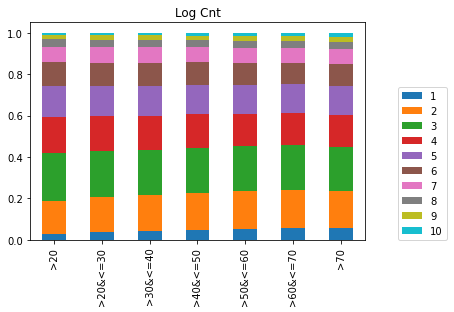

In [60]:
temp_df.plot(kind='bar', stacked=True, legend=False, title='Log Cnt')
plt.legend(loc=[1.1, 0])

### 点击 creative nunique 个数

In [30]:
temp_df = grid_df.groupby(['user_id']).agg({'creative_id': 'nunique', 'age': 'first'}).reset_index()

In [31]:
print('最小点击次数： %d， 最大点击次数： %d' % (temp_df['creative_id'].min(), temp_df['creative_id'].max()))

最小点击次数： 1， 最大点击次数： 11030


In [ ]:
temp_df = temp_df.rename(columns={'creative_id': 'click_times'})

b20 = temp_df[temp_df['click_times']<=20]
b20 = b20.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20 = b20.rename(columns={'user_id': 'log_cnt'})
b20['log_cnt_pct'] = b20['log_cnt'] / b20['log_cnt'].sum()

b20 = b20[['age', 'log_cnt_pct']]
b20 = b20.set_index(['age'])
b20 = b20.unstack().unstack(1)
b20 = b20.reset_index(drop=True)
b20 = b20.rename(index={0: '>20'})

display(b20)

b20_t_30 = temp_df[(temp_df['click_times']>20) & (temp_df['click_times']<=30)]
b20_t_30 = b20_t_30.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20_t_30 = b20_t_30.rename(columns={'user_id': 'log_cnt'})
b20_t_30['log_cnt_pct'] = b20_t_30['log_cnt'] / b20_t_30['log_cnt'].sum()

b20_t_30 = b20_t_30[['age', 'log_cnt_pct']]
b20_t_30 = b20_t_30.set_index(['age'])
b20_t_30 = b20_t_30.unstack().unstack(1)
b20_t_30 = b20_t_30.reset_index(drop=True)
b20_t_30 = b20_t_30.rename(index={0: '>20&<=30'})

display(b20_t_30)

b30_t_40 = temp_df[(temp_df['click_times']>30) & (temp_df['click_times']<=40)]
b30_t_40 = b30_t_40.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b30_t_40 = b30_t_40.rename(columns={'user_id': 'log_cnt'})
b30_t_40['log_cnt_pct'] = b30_t_40['log_cnt'] / b30_t_40['log_cnt'].sum()

b30_t_40 = b30_t_40[['age', 'log_cnt_pct']]
b30_t_40 = b30_t_40.set_index(['age'])
b30_t_40 = b30_t_40.unstack().unstack(1)
b30_t_40 = b30_t_40.reset_index(drop=True)
b30_t_40 = b30_t_40.rename(index={0: '>30&<=40'})

display(b30_t_40)

b40_t_50 = temp_df[(temp_df['click_times']>40) & (temp_df['click_times']<=50)]
b40_t_50 = b40_t_50.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b40_t_50 = b40_t_50.rename(columns={'user_id': 'log_cnt'})
b40_t_50['log_cnt_pct'] = b40_t_50['log_cnt'] / b40_t_50['log_cnt'].sum()

b40_t_50 = b40_t_50[['age', 'log_cnt_pct']]
b40_t_50 = b40_t_50.set_index(['age'])
b40_t_50 = b40_t_50.unstack().unstack(1)
b40_t_50 = b40_t_50.reset_index(drop=True)
b40_t_50 = b40_t_50.rename(index={0: '>40&<=50'})

display(b40_t_50)

b50_t_60 = temp_df[(temp_df['click_times']>50) & (temp_df['click_times']<=60)]
b50_t_60 = b50_t_60.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b50_t_60 = b50_t_60.rename(columns={'user_id': 'log_cnt'})
b50_t_60['log_cnt_pct'] = b50_t_60['log_cnt'] / b50_t_60['log_cnt'].sum()

b50_t_60 = b50_t_60[['age', 'log_cnt_pct']]
b50_t_60 = b50_t_60.set_index(['age'])
b50_t_60 = b50_t_60.unstack().unstack(1)
b50_t_60 = b50_t_60.reset_index(drop=True)
b50_t_60 = b50_t_60.rename(index={0: '>50&<=60'})

display(b50_t_60)

b60_t_70 = temp_df[(temp_df['click_times']>60) & (temp_df['click_times']<=70)]
b60_t_70 = b60_t_70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b60_t_70 = b60_t_70.rename(columns={'user_id': 'log_cnt'})
b60_t_70['log_cnt_pct'] = b60_t_70['log_cnt'] / b60_t_70['log_cnt'].sum()

b60_t_70 = b60_t_70[['age', 'log_cnt_pct']]
b60_t_70 = b60_t_70.set_index(['age'])
b60_t_70 = b60_t_70.unstack().unstack(1)
b60_t_70 = b60_t_70.reset_index(drop=True)
b60_t_70 = b60_t_70.rename(index={0: '>60&<=70'})

display(b60_t_70)

t70 = temp_df[temp_df['click_times']>70]
t70 = t70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
t70 = t70.rename(columns={'user_id': 'log_cnt'})
t70['log_cnt_pct'] = t70['log_cnt'] / t70['log_cnt'].sum()

t70 = t70[['age', 'log_cnt_pct']]
t70 = t70.set_index(['age'])
t70 = t70.unstack().unstack(1)
t70 = t70.reset_index(drop=True)
t70 = t70.rename(index={0: '>70'})

display(t70)

### 重复点击的行数

In [ ]:
temp_df = pd.concat([b20, b20_t_30, b30_t_40, b40_t_50, b50_t_60, b60_t_70, t70], axis=0)
display(temp_df, n=10)

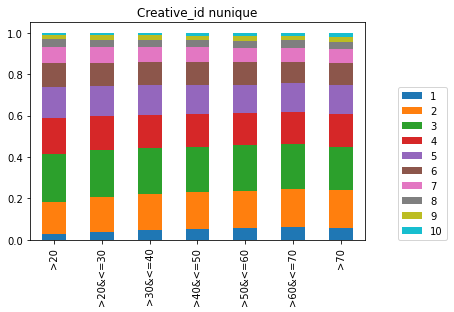

In [37]:
temp_df.plot(kind='bar', stacked=True, legend=False, title='Creative_id nunique')
plt.legend(loc=[1.1, 0])

### 活跃天数

In [50]:
temp_df = grid_df.groupby(['user_id']).agg({'age': 'first', 'time': 'nunique'}).reset_index()

In [51]:
temp_df = temp_df.rename(columns={'time': 'click_times'})

b20 = temp_df[temp_df['click_times']<=10]
b20 = b20.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20 = b20.rename(columns={'user_id': 'log_cnt'})
b20['log_cnt_pct'] = b20['log_cnt'] / b20['log_cnt'].sum()

b20 = b20[['age', 'log_cnt_pct']]
b20 = b20.set_index(['age'])
b20 = b20.unstack().unstack(1)
b20 = b20.reset_index(drop=True)
b20 = b20.rename(index={0: '<=10'})

display(b20)

b20_t_30 = temp_df[(temp_df['click_times']>10) & (temp_df['click_times']<=12)]
b20_t_30 = b20_t_30.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20_t_30 = b20_t_30.rename(columns={'user_id': 'log_cnt'})
b20_t_30['log_cnt_pct'] = b20_t_30['log_cnt'] / b20_t_30['log_cnt'].sum()

b20_t_30 = b20_t_30[['age', 'log_cnt_pct']]
b20_t_30 = b20_t_30.set_index(['age'])
b20_t_30 = b20_t_30.unstack().unstack(1)
b20_t_30 = b20_t_30.reset_index(drop=True)
b20_t_30 = b20_t_30.rename(index={0: '>10&<=12'})

display(b20_t_30)

b30_t_40 = temp_df[(temp_df['click_times']>12) & (temp_df['click_times']<=15)]
b30_t_40 = b30_t_40.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b30_t_40 = b30_t_40.rename(columns={'user_id': 'log_cnt'})
b30_t_40['log_cnt_pct'] = b30_t_40['log_cnt'] / b30_t_40['log_cnt'].sum()

b30_t_40 = b30_t_40[['age', 'log_cnt_pct']]
b30_t_40 = b30_t_40.set_index(['age'])
b30_t_40 = b30_t_40.unstack().unstack(1)
b30_t_40 = b30_t_40.reset_index(drop=True)
b30_t_40 = b30_t_40.rename(index={0: '>12&<=15'})

display(b30_t_40)

b40_t_50 = temp_df[(temp_df['click_times']>15) & (temp_df['click_times']<=18)]
b40_t_50 = b40_t_50.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b40_t_50 = b40_t_50.rename(columns={'user_id': 'log_cnt'})
b40_t_50['log_cnt_pct'] = b40_t_50['log_cnt'] / b40_t_50['log_cnt'].sum()

b40_t_50 = b40_t_50[['age', 'log_cnt_pct']]
b40_t_50 = b40_t_50.set_index(['age'])
b40_t_50 = b40_t_50.unstack().unstack(1)
b40_t_50 = b40_t_50.reset_index(drop=True)
b40_t_50 = b40_t_50.rename(index={0: '>15&<=18'})

display(b40_t_50)

b50_t_60 = temp_df[(temp_df['click_times']>18) & (temp_df['click_times']<=20)]
b50_t_60 = b50_t_60.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b50_t_60 = b50_t_60.rename(columns={'user_id': 'log_cnt'})
b50_t_60['log_cnt_pct'] = b50_t_60['log_cnt'] / b50_t_60['log_cnt'].sum()

b50_t_60 = b50_t_60[['age', 'log_cnt_pct']]
b50_t_60 = b50_t_60.set_index(['age'])
b50_t_60 = b50_t_60.unstack().unstack(1)
b50_t_60 = b50_t_60.reset_index(drop=True)
b50_t_60 = b50_t_60.rename(index={0: '>18&<=20'})

display(b50_t_60)

b60_t_70 = temp_df[(temp_df['click_times']>20) & (temp_df['click_times']<=30)]
b60_t_70 = b60_t_70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b60_t_70 = b60_t_70.rename(columns={'user_id': 'log_cnt'})
b60_t_70['log_cnt_pct'] = b60_t_70['log_cnt'] / b60_t_70['log_cnt'].sum()

b60_t_70 = b60_t_70[['age', 'log_cnt_pct']]
b60_t_70 = b60_t_70.set_index(['age'])
b60_t_70 = b60_t_70.unstack().unstack(1)
b60_t_70 = b60_t_70.reset_index(drop=True)
b60_t_70 = b60_t_70.rename(index={0: '>20&<=30'})

display(b60_t_70)

t70 = temp_df[temp_df['click_times']>30]
t70 = t70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
t70 = t70.rename(columns={'user_id': 'log_cnt'})
t70['log_cnt_pct'] = t70['log_cnt'] / t70['log_cnt'].sum()

t70 = t70[['age', 'log_cnt_pct']]
t70 = t70.set_index(['age'])
t70 = t70.unstack().unstack(1)
t70 = t70.reset_index(drop=True)
t70 = t70.rename(index={0: '>30'})

display(t70)

age,1,2,3,4,5,6,7,8,9,10
<=10,0.029034,0.145628,0.229718,0.175705,0.15409,0.120063,0.077158,0.036262,0.021615,0.010726


age,1,2,3,4,5,6,7,8,9,10
>10&<=12,0.029371,0.155159,0.233631,0.175044,0.148937,0.116918,0.074849,0.034812,0.020583,0.010697


age,1,2,3,4,5,6,7,8,9,10
>12&<=15,0.032851,0.162422,0.234625,0.16852,0.147208,0.113552,0.073099,0.035958,0.020646,0.01112


age,1,2,3,4,5,6,7,8,9,10
>15&<=18,0.037061,0.167164,0.228725,0.170167,0.143201,0.112237,0.074548,0.0349,0.020443,0.011555


age,1,2,3,4,5,6,7,8,9,10
>18&<=20,0.03884,0.172145,0.224909,0.167647,0.144926,0.111501,0.072697,0.035188,0.020311,0.011837


age,1,2,3,4,5,6,7,8,9,10
>20&<=30,0.042835,0.171328,0.220994,0.164465,0.143284,0.112114,0.074118,0.035592,0.022105,0.013165


age,1,2,3,4,5,6,7,8,9,10
>30,0.052808,0.180395,0.215318,0.157722,0.138438,0.107274,0.072367,0.035391,0.023344,0.016944


In [52]:
temp_df = pd.concat([b20, b20_t_30, b30_t_40, b40_t_50, b50_t_60, b60_t_70, t70], axis=0)
display(temp_df, n=10)

age,1,2,3,4,5,6,7,8,9,10
<=10,0.029034,0.145628,0.229718,0.175705,0.154090,0.120063,0.077158,0.036262,0.021615,0.010726
>10&<=12,0.029371,0.155159,0.233631,0.175044,0.148937,0.116918,0.074849,0.034812,0.020583,0.010697
>12&<=15,0.032851,0.162422,0.234625,0.168520,0.147208,0.113552,0.073099,0.035958,0.020646,0.011120
>15&<=18,0.037061,0.167164,0.228725,0.170167,0.143201,0.112237,0.074548,0.034900,0.020443,0.011555
>18&<=20,0.038840,0.172145,0.224909,0.167647,0.144926,0.111501,0.072697,0.035188,0.020311,0.011837
>20&<=30,0.042835,0.171328,0.220994,0.164465,0.143284,0.112114,0.074118,0.035592,0.022105,0.013165
>30,0.052808,0.180395,0.215318,0.157722,0.138438,0.107274,0.072367,0.035391,0.023344,0.016944


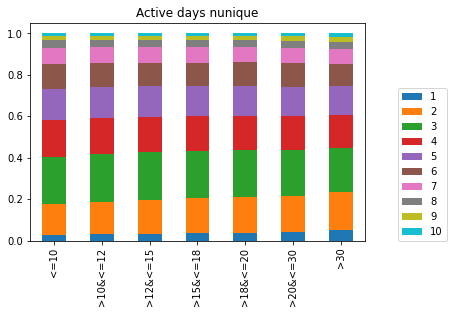

In [53]:
temp_df.plot(kind='bar', stacked=True, legend=False, title='Active days nunique')
plt.legend(loc=[1.1, 0])

### 星期年龄分布

In [81]:
tr_log_df['wd'] = tr_log_df['time'] % 7
temp_df1 = pd.concat([tr_log_df, tr_user_df[['age']]], axis=1)

In [82]:
temp_df1 = temp_df1.groupby(['user_id', 'wd']).agg({'click_times': 'count', 'age': 'first'}).reset_index()

age,1,2,3,4,5,6,7,8,9,10
<=2,0.028568,0.161709,0.233758,0.173630,0.147294,0.114186,0.073117,0.035679,0.020957,0.011103
>2&<=3,0.032845,0.162260,0.229647,0.170853,0.146957,0.112600,0.075156,0.036192,0.021293,0.012199
>3&<=4,0.037799,0.168410,0.225542,0.166878,0.145479,0.112892,0.074216,0.035158,0.021792,0.011833
>4&<=6,0.042748,0.169777,0.224686,0.162658,0.143071,0.112961,0.074280,0.035151,0.021553,0.013115
>6&<=8,0.051116,0.174245,0.217820,0.160659,0.140164,0.108690,0.076081,0.035632,0.021542,0.014051
>8&<=10,0.055707,0.175656,0.215286,0.156727,0.139029,0.113466,0.072064,0.034747,0.022948,0.014370
>10,0.063919,0.170556,0.204653,0.156941,0.142384,0.112615,0.074202,0.034900,0.022576,0.017255


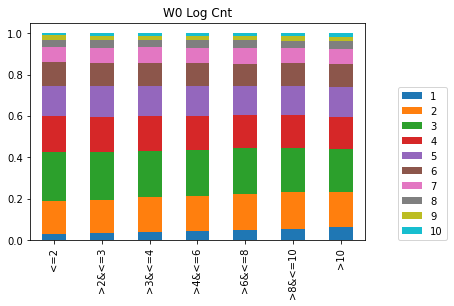

In [91]:
w0_df = temp_df1.loc[temp_df1['wd']==0, ['user_id', 'age', 'click_times']]
temp_df = w0_df

b20 = temp_df[temp_df['click_times']<=2]
b20 = b20.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20 = b20.rename(columns={'user_id': 'log_cnt'})
b20['log_cnt_pct'] = b20['log_cnt'] / b20['log_cnt'].sum()

b20 = b20[['age', 'log_cnt_pct']]
b20 = b20.set_index(['age'])
b20 = b20.unstack().unstack(1)
b20 = b20.reset_index(drop=True)
b20 = b20.rename(index={0: '<=2'})

# display(b20)

b20_t_30 = temp_df[(temp_df['click_times']>2) & (temp_df['click_times']<=3)]
b20_t_30 = b20_t_30.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20_t_30 = b20_t_30.rename(columns={'user_id': 'log_cnt'})
b20_t_30['log_cnt_pct'] = b20_t_30['log_cnt'] / b20_t_30['log_cnt'].sum()

b20_t_30 = b20_t_30[['age', 'log_cnt_pct']]
b20_t_30 = b20_t_30.set_index(['age'])
b20_t_30 = b20_t_30.unstack().unstack(1)
b20_t_30 = b20_t_30.reset_index(drop=True)
b20_t_30 = b20_t_30.rename(index={0: '>2&<=3'})

# display(b20_t_30)

b30_t_40 = temp_df[(temp_df['click_times']>3) & (temp_df['click_times']<=4)]
b30_t_40 = b30_t_40.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b30_t_40 = b30_t_40.rename(columns={'user_id': 'log_cnt'})
b30_t_40['log_cnt_pct'] = b30_t_40['log_cnt'] / b30_t_40['log_cnt'].sum()

b30_t_40 = b30_t_40[['age', 'log_cnt_pct']]
b30_t_40 = b30_t_40.set_index(['age'])
b30_t_40 = b30_t_40.unstack().unstack(1)
b30_t_40 = b30_t_40.reset_index(drop=True)
b30_t_40 = b30_t_40.rename(index={0: '>3&<=4'})

# display(b30_t_40)

b40_t_50 = temp_df[(temp_df['click_times']>4) & (temp_df['click_times']<=6)]
b40_t_50 = b40_t_50.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b40_t_50 = b40_t_50.rename(columns={'user_id': 'log_cnt'})
b40_t_50['log_cnt_pct'] = b40_t_50['log_cnt'] / b40_t_50['log_cnt'].sum()

b40_t_50 = b40_t_50[['age', 'log_cnt_pct']]
b40_t_50 = b40_t_50.set_index(['age'])
b40_t_50 = b40_t_50.unstack().unstack(1)
b40_t_50 = b40_t_50.reset_index(drop=True)
b40_t_50 = b40_t_50.rename(index={0: '>4&<=6'})

# display(b40_t_50)

b50_t_60 = temp_df[(temp_df['click_times']>6) & (temp_df['click_times']<=8)]
b50_t_60 = b50_t_60.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b50_t_60 = b50_t_60.rename(columns={'user_id': 'log_cnt'})
b50_t_60['log_cnt_pct'] = b50_t_60['log_cnt'] / b50_t_60['log_cnt'].sum()

b50_t_60 = b50_t_60[['age', 'log_cnt_pct']]
b50_t_60 = b50_t_60.set_index(['age'])
b50_t_60 = b50_t_60.unstack().unstack(1)
b50_t_60 = b50_t_60.reset_index(drop=True)
b50_t_60 = b50_t_60.rename(index={0: '>6&<=8'})

# display(b50_t_60)

b60_t_70 = temp_df[(temp_df['click_times']>8) & (temp_df['click_times']<=10)]
b60_t_70 = b60_t_70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b60_t_70 = b60_t_70.rename(columns={'user_id': 'log_cnt'})
b60_t_70['log_cnt_pct'] = b60_t_70['log_cnt'] / b60_t_70['log_cnt'].sum()

b60_t_70 = b60_t_70[['age', 'log_cnt_pct']]
b60_t_70 = b60_t_70.set_index(['age'])
b60_t_70 = b60_t_70.unstack().unstack(1)
b60_t_70 = b60_t_70.reset_index(drop=True)
b60_t_70 = b60_t_70.rename(index={0: '>8&<=10'})

# display(b60_t_70)

t70 = temp_df[temp_df['click_times']>10]
t70 = t70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
t70 = t70.rename(columns={'user_id': 'log_cnt'})
t70['log_cnt_pct'] = t70['log_cnt'] / t70['log_cnt'].sum()

t70 = t70[['age', 'log_cnt_pct']]
t70 = t70.set_index(['age'])
t70 = t70.unstack().unstack(1)
t70 = t70.reset_index(drop=True)
t70 = t70.rename(index={0: '>10'})

# display(t70)

temp_df = pd.concat([b20, b20_t_30, b30_t_40, b40_t_50, b50_t_60, b60_t_70, t70], axis=0)
display(temp_df, n=10)

temp_df.plot(kind='bar', stacked=True, legend=False, title='W0 Log Cnt')
plt.legend(loc=[1.1, 0])

age,1,2,3,4,5,6,7,8,9,10
<=2,0.030092,0.160636,0.233989,0.173373,0.148187,0.113366,0.072602,0.035090,0.021276,0.011388
>2&<=3,0.034886,0.164569,0.230344,0.169196,0.144747,0.113105,0.074772,0.035533,0.021254,0.011594
>3&<=4,0.036871,0.164958,0.226554,0.166847,0.145801,0.113357,0.075730,0.036900,0.021563,0.011418
>4&<=6,0.042135,0.167581,0.224179,0.164013,0.143001,0.113621,0.075076,0.035739,0.021775,0.012880
>6&<=8,0.048887,0.172409,0.216829,0.162195,0.140186,0.111326,0.075828,0.036314,0.021808,0.014217
>8&<=10,0.051839,0.180381,0.213839,0.155998,0.138224,0.112963,0.073775,0.034671,0.022961,0.015349
>10,0.059196,0.174678,0.207278,0.157712,0.143441,0.110667,0.073119,0.034341,0.022344,0.017222


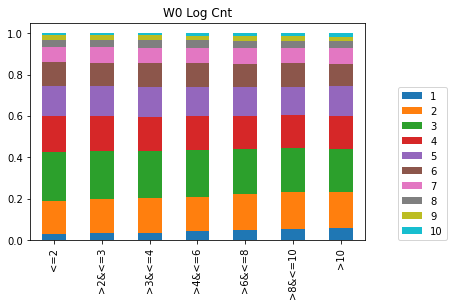

In [92]:
w0_df = temp_df1.loc[temp_df1['wd']==1, ['user_id', 'age', 'click_times']]
temp_df = w0_df

b20 = temp_df[temp_df['click_times']<=2]
b20 = b20.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20 = b20.rename(columns={'user_id': 'log_cnt'})
b20['log_cnt_pct'] = b20['log_cnt'] / b20['log_cnt'].sum()

b20 = b20[['age', 'log_cnt_pct']]
b20 = b20.set_index(['age'])
b20 = b20.unstack().unstack(1)
b20 = b20.reset_index(drop=True)
b20 = b20.rename(index={0: '<=2'})

# display(b20)

b20_t_30 = temp_df[(temp_df['click_times']>2) & (temp_df['click_times']<=3)]
b20_t_30 = b20_t_30.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20_t_30 = b20_t_30.rename(columns={'user_id': 'log_cnt'})
b20_t_30['log_cnt_pct'] = b20_t_30['log_cnt'] / b20_t_30['log_cnt'].sum()

b20_t_30 = b20_t_30[['age', 'log_cnt_pct']]
b20_t_30 = b20_t_30.set_index(['age'])
b20_t_30 = b20_t_30.unstack().unstack(1)
b20_t_30 = b20_t_30.reset_index(drop=True)
b20_t_30 = b20_t_30.rename(index={0: '>2&<=3'})

# display(b20_t_30)

b30_t_40 = temp_df[(temp_df['click_times']>3) & (temp_df['click_times']<=4)]
b30_t_40 = b30_t_40.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b30_t_40 = b30_t_40.rename(columns={'user_id': 'log_cnt'})
b30_t_40['log_cnt_pct'] = b30_t_40['log_cnt'] / b30_t_40['log_cnt'].sum()

b30_t_40 = b30_t_40[['age', 'log_cnt_pct']]
b30_t_40 = b30_t_40.set_index(['age'])
b30_t_40 = b30_t_40.unstack().unstack(1)
b30_t_40 = b30_t_40.reset_index(drop=True)
b30_t_40 = b30_t_40.rename(index={0: '>3&<=4'})

# display(b30_t_40)

b40_t_50 = temp_df[(temp_df['click_times']>4) & (temp_df['click_times']<=6)]
b40_t_50 = b40_t_50.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b40_t_50 = b40_t_50.rename(columns={'user_id': 'log_cnt'})
b40_t_50['log_cnt_pct'] = b40_t_50['log_cnt'] / b40_t_50['log_cnt'].sum()

b40_t_50 = b40_t_50[['age', 'log_cnt_pct']]
b40_t_50 = b40_t_50.set_index(['age'])
b40_t_50 = b40_t_50.unstack().unstack(1)
b40_t_50 = b40_t_50.reset_index(drop=True)
b40_t_50 = b40_t_50.rename(index={0: '>4&<=6'})

# display(b40_t_50)

b50_t_60 = temp_df[(temp_df['click_times']>6) & (temp_df['click_times']<=8)]
b50_t_60 = b50_t_60.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b50_t_60 = b50_t_60.rename(columns={'user_id': 'log_cnt'})
b50_t_60['log_cnt_pct'] = b50_t_60['log_cnt'] / b50_t_60['log_cnt'].sum()

b50_t_60 = b50_t_60[['age', 'log_cnt_pct']]
b50_t_60 = b50_t_60.set_index(['age'])
b50_t_60 = b50_t_60.unstack().unstack(1)
b50_t_60 = b50_t_60.reset_index(drop=True)
b50_t_60 = b50_t_60.rename(index={0: '>6&<=8'})

# display(b50_t_60)

b60_t_70 = temp_df[(temp_df['click_times']>8) & (temp_df['click_times']<=10)]
b60_t_70 = b60_t_70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b60_t_70 = b60_t_70.rename(columns={'user_id': 'log_cnt'})
b60_t_70['log_cnt_pct'] = b60_t_70['log_cnt'] / b60_t_70['log_cnt'].sum()

b60_t_70 = b60_t_70[['age', 'log_cnt_pct']]
b60_t_70 = b60_t_70.set_index(['age'])
b60_t_70 = b60_t_70.unstack().unstack(1)
b60_t_70 = b60_t_70.reset_index(drop=True)
b60_t_70 = b60_t_70.rename(index={0: '>8&<=10'})

# display(b60_t_70)

t70 = temp_df[temp_df['click_times']>10]
t70 = t70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
t70 = t70.rename(columns={'user_id': 'log_cnt'})
t70['log_cnt_pct'] = t70['log_cnt'] / t70['log_cnt'].sum()

t70 = t70[['age', 'log_cnt_pct']]
t70 = t70.set_index(['age'])
t70 = t70.unstack().unstack(1)
t70 = t70.reset_index(drop=True)
t70 = t70.rename(index={0: '>10'})

# display(t70)

temp_df = pd.concat([b20, b20_t_30, b30_t_40, b40_t_50, b50_t_60, b60_t_70, t70], axis=0)
display(temp_df, n=10)

temp_df.plot(kind='bar', stacked=True, legend=False, title='W0 Log Cnt')
plt.legend(loc=[1.1, 0])

age,1,2,3,4,5,6,7,8,9,10
<=2,0.034203,0.160836,0.232152,0.170370,0.146260,0.114628,0.074860,0.035408,0.020378,0.010905
>2&<=3,0.035365,0.164959,0.227306,0.170814,0.145850,0.113787,0.072724,0.036004,0.021055,0.012135
>3&<=4,0.035947,0.164132,0.225757,0.168522,0.146169,0.113629,0.075573,0.035703,0.022434,0.012134
>4&<=6,0.040676,0.170013,0.221452,0.165531,0.144438,0.113573,0.074613,0.034844,0.021840,0.013020
>6&<=8,0.044778,0.175347,0.220057,0.161518,0.142439,0.110212,0.073443,0.035314,0.022546,0.014346
>8&<=10,0.048191,0.178159,0.215471,0.163739,0.140268,0.110224,0.071430,0.034442,0.022498,0.015578
>10,0.052719,0.179229,0.215276,0.159024,0.139624,0.104419,0.069768,0.035318,0.024706,0.019916


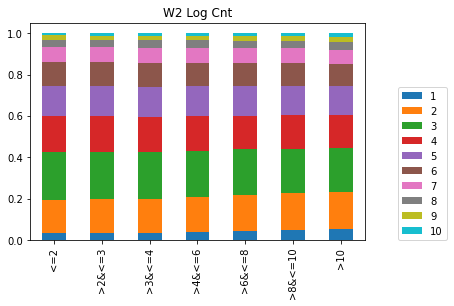

In [93]:
w0_df = temp_df1.loc[temp_df1['wd']==2, ['user_id', 'age', 'click_times']]
temp_df = w0_df

b20 = temp_df[temp_df['click_times']<=2]
b20 = b20.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20 = b20.rename(columns={'user_id': 'log_cnt'})
b20['log_cnt_pct'] = b20['log_cnt'] / b20['log_cnt'].sum()

b20 = b20[['age', 'log_cnt_pct']]
b20 = b20.set_index(['age'])
b20 = b20.unstack().unstack(1)
b20 = b20.reset_index(drop=True)
b20 = b20.rename(index={0: '<=2'})

# display(b20)

b20_t_30 = temp_df[(temp_df['click_times']>2) & (temp_df['click_times']<=3)]
b20_t_30 = b20_t_30.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20_t_30 = b20_t_30.rename(columns={'user_id': 'log_cnt'})
b20_t_30['log_cnt_pct'] = b20_t_30['log_cnt'] / b20_t_30['log_cnt'].sum()

b20_t_30 = b20_t_30[['age', 'log_cnt_pct']]
b20_t_30 = b20_t_30.set_index(['age'])
b20_t_30 = b20_t_30.unstack().unstack(1)
b20_t_30 = b20_t_30.reset_index(drop=True)
b20_t_30 = b20_t_30.rename(index={0: '>2&<=3'})

# display(b20_t_30)

b30_t_40 = temp_df[(temp_df['click_times']>3) & (temp_df['click_times']<=4)]
b30_t_40 = b30_t_40.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b30_t_40 = b30_t_40.rename(columns={'user_id': 'log_cnt'})
b30_t_40['log_cnt_pct'] = b30_t_40['log_cnt'] / b30_t_40['log_cnt'].sum()

b30_t_40 = b30_t_40[['age', 'log_cnt_pct']]
b30_t_40 = b30_t_40.set_index(['age'])
b30_t_40 = b30_t_40.unstack().unstack(1)
b30_t_40 = b30_t_40.reset_index(drop=True)
b30_t_40 = b30_t_40.rename(index={0: '>3&<=4'})

# display(b30_t_40)

b40_t_50 = temp_df[(temp_df['click_times']>4) & (temp_df['click_times']<=6)]
b40_t_50 = b40_t_50.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b40_t_50 = b40_t_50.rename(columns={'user_id': 'log_cnt'})
b40_t_50['log_cnt_pct'] = b40_t_50['log_cnt'] / b40_t_50['log_cnt'].sum()

b40_t_50 = b40_t_50[['age', 'log_cnt_pct']]
b40_t_50 = b40_t_50.set_index(['age'])
b40_t_50 = b40_t_50.unstack().unstack(1)
b40_t_50 = b40_t_50.reset_index(drop=True)
b40_t_50 = b40_t_50.rename(index={0: '>4&<=6'})

# display(b40_t_50)

b50_t_60 = temp_df[(temp_df['click_times']>6) & (temp_df['click_times']<=8)]
b50_t_60 = b50_t_60.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b50_t_60 = b50_t_60.rename(columns={'user_id': 'log_cnt'})
b50_t_60['log_cnt_pct'] = b50_t_60['log_cnt'] / b50_t_60['log_cnt'].sum()

b50_t_60 = b50_t_60[['age', 'log_cnt_pct']]
b50_t_60 = b50_t_60.set_index(['age'])
b50_t_60 = b50_t_60.unstack().unstack(1)
b50_t_60 = b50_t_60.reset_index(drop=True)
b50_t_60 = b50_t_60.rename(index={0: '>6&<=8'})

# display(b50_t_60)

b60_t_70 = temp_df[(temp_df['click_times']>8) & (temp_df['click_times']<=10)]
b60_t_70 = b60_t_70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b60_t_70 = b60_t_70.rename(columns={'user_id': 'log_cnt'})
b60_t_70['log_cnt_pct'] = b60_t_70['log_cnt'] / b60_t_70['log_cnt'].sum()

b60_t_70 = b60_t_70[['age', 'log_cnt_pct']]
b60_t_70 = b60_t_70.set_index(['age'])
b60_t_70 = b60_t_70.unstack().unstack(1)
b60_t_70 = b60_t_70.reset_index(drop=True)
b60_t_70 = b60_t_70.rename(index={0: '>8&<=10'})

# display(b60_t_70)

t70 = temp_df[temp_df['click_times']>10]
t70 = t70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
t70 = t70.rename(columns={'user_id': 'log_cnt'})
t70['log_cnt_pct'] = t70['log_cnt'] / t70['log_cnt'].sum()

t70 = t70[['age', 'log_cnt_pct']]
t70 = t70.set_index(['age'])
t70 = t70.unstack().unstack(1)
t70 = t70.reset_index(drop=True)
t70 = t70.rename(index={0: '>10'})

# display(t70)

temp_df = pd.concat([b20, b20_t_30, b30_t_40, b40_t_50, b50_t_60, b60_t_70, t70], axis=0)
display(temp_df, n=10)

temp_df.plot(kind='bar', stacked=True, legend=False, title='W2 Log Cnt')
plt.legend(loc=[1.1, 0])

age,1,2,3,4,5,6,7,8,9,10
<=2,0.033686,0.158444,0.229779,0.172002,0.147578,0.115949,0.075493,0.035410,0.020501,0.011156
>2&<=3,0.034444,0.164085,0.227991,0.169099,0.146953,0.113928,0.074833,0.035572,0.021578,0.011518
>3&<=4,0.037039,0.166478,0.226039,0.166569,0.145430,0.113227,0.075390,0.036029,0.021513,0.012286
>4&<=6,0.039594,0.171438,0.222783,0.166333,0.144572,0.111517,0.073579,0.035527,0.021914,0.012743
>6&<=8,0.045470,0.178132,0.224164,0.160447,0.141334,0.107980,0.069947,0.034644,0.022460,0.015422
>8&<=10,0.051089,0.178681,0.218414,0.163258,0.138736,0.106009,0.069615,0.034278,0.023158,0.016763
>10,0.054081,0.179952,0.214373,0.157556,0.138542,0.104308,0.070110,0.036311,0.025206,0.019561


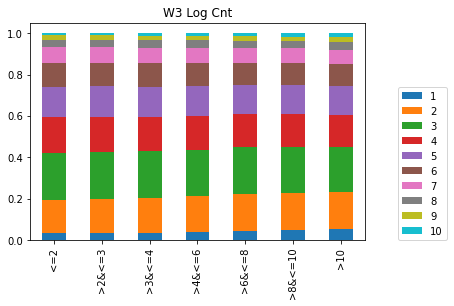

In [94]:
w0_df = temp_df1.loc[temp_df1['wd']==3, ['user_id', 'age', 'click_times']]
temp_df = w0_df

b20 = temp_df[temp_df['click_times']<=2]
b20 = b20.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20 = b20.rename(columns={'user_id': 'log_cnt'})
b20['log_cnt_pct'] = b20['log_cnt'] / b20['log_cnt'].sum()

b20 = b20[['age', 'log_cnt_pct']]
b20 = b20.set_index(['age'])
b20 = b20.unstack().unstack(1)
b20 = b20.reset_index(drop=True)
b20 = b20.rename(index={0: '<=2'})

# display(b20)

b20_t_30 = temp_df[(temp_df['click_times']>2) & (temp_df['click_times']<=3)]
b20_t_30 = b20_t_30.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20_t_30 = b20_t_30.rename(columns={'user_id': 'log_cnt'})
b20_t_30['log_cnt_pct'] = b20_t_30['log_cnt'] / b20_t_30['log_cnt'].sum()

b20_t_30 = b20_t_30[['age', 'log_cnt_pct']]
b20_t_30 = b20_t_30.set_index(['age'])
b20_t_30 = b20_t_30.unstack().unstack(1)
b20_t_30 = b20_t_30.reset_index(drop=True)
b20_t_30 = b20_t_30.rename(index={0: '>2&<=3'})

# display(b20_t_30)

b30_t_40 = temp_df[(temp_df['click_times']>3) & (temp_df['click_times']<=4)]
b30_t_40 = b30_t_40.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b30_t_40 = b30_t_40.rename(columns={'user_id': 'log_cnt'})
b30_t_40['log_cnt_pct'] = b30_t_40['log_cnt'] / b30_t_40['log_cnt'].sum()

b30_t_40 = b30_t_40[['age', 'log_cnt_pct']]
b30_t_40 = b30_t_40.set_index(['age'])
b30_t_40 = b30_t_40.unstack().unstack(1)
b30_t_40 = b30_t_40.reset_index(drop=True)
b30_t_40 = b30_t_40.rename(index={0: '>3&<=4'})

# display(b30_t_40)

b40_t_50 = temp_df[(temp_df['click_times']>4) & (temp_df['click_times']<=6)]
b40_t_50 = b40_t_50.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b40_t_50 = b40_t_50.rename(columns={'user_id': 'log_cnt'})
b40_t_50['log_cnt_pct'] = b40_t_50['log_cnt'] / b40_t_50['log_cnt'].sum()

b40_t_50 = b40_t_50[['age', 'log_cnt_pct']]
b40_t_50 = b40_t_50.set_index(['age'])
b40_t_50 = b40_t_50.unstack().unstack(1)
b40_t_50 = b40_t_50.reset_index(drop=True)
b40_t_50 = b40_t_50.rename(index={0: '>4&<=6'})

# display(b40_t_50)

b50_t_60 = temp_df[(temp_df['click_times']>6) & (temp_df['click_times']<=8)]
b50_t_60 = b50_t_60.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b50_t_60 = b50_t_60.rename(columns={'user_id': 'log_cnt'})
b50_t_60['log_cnt_pct'] = b50_t_60['log_cnt'] / b50_t_60['log_cnt'].sum()

b50_t_60 = b50_t_60[['age', 'log_cnt_pct']]
b50_t_60 = b50_t_60.set_index(['age'])
b50_t_60 = b50_t_60.unstack().unstack(1)
b50_t_60 = b50_t_60.reset_index(drop=True)
b50_t_60 = b50_t_60.rename(index={0: '>6&<=8'})

# display(b50_t_60)

b60_t_70 = temp_df[(temp_df['click_times']>8) & (temp_df['click_times']<=10)]
b60_t_70 = b60_t_70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b60_t_70 = b60_t_70.rename(columns={'user_id': 'log_cnt'})
b60_t_70['log_cnt_pct'] = b60_t_70['log_cnt'] / b60_t_70['log_cnt'].sum()

b60_t_70 = b60_t_70[['age', 'log_cnt_pct']]
b60_t_70 = b60_t_70.set_index(['age'])
b60_t_70 = b60_t_70.unstack().unstack(1)
b60_t_70 = b60_t_70.reset_index(drop=True)
b60_t_70 = b60_t_70.rename(index={0: '>8&<=10'})

# display(b60_t_70)

t70 = temp_df[temp_df['click_times']>10]
t70 = t70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
t70 = t70.rename(columns={'user_id': 'log_cnt'})
t70['log_cnt_pct'] = t70['log_cnt'] / t70['log_cnt'].sum()

t70 = t70[['age', 'log_cnt_pct']]
t70 = t70.set_index(['age'])
t70 = t70.unstack().unstack(1)
t70 = t70.reset_index(drop=True)
t70 = t70.rename(index={0: '>10'})

# display(t70)

temp_df = pd.concat([b20, b20_t_30, b30_t_40, b40_t_50, b50_t_60, b60_t_70, t70], axis=0)
display(temp_df, n=10)

temp_df.plot(kind='bar', stacked=True, legend=False, title='W3 Log Cnt')
plt.legend(loc=[1.1, 0])

age,1,2,3,4,5,6,7,8,9,10
<=2,0.033976,0.158050,0.229824,0.170997,0.149377,0.115077,0.074929,0.035726,0.020955,0.011089
>2&<=3,0.034326,0.163710,0.228585,0.170715,0.145881,0.114193,0.074869,0.035243,0.021280,0.011198
>3&<=4,0.037771,0.165865,0.225770,0.168175,0.145589,0.112046,0.075059,0.035943,0.021331,0.012453
>4&<=6,0.039432,0.171545,0.222576,0.165508,0.144061,0.112674,0.073826,0.035659,0.021432,0.013288
>6&<=8,0.044103,0.176786,0.223438,0.160813,0.138982,0.111212,0.074101,0.034242,0.022152,0.014172
>8&<=10,0.049603,0.181039,0.222578,0.160442,0.137104,0.104988,0.070038,0.035503,0.023223,0.015482
>10,0.053804,0.179833,0.213133,0.159233,0.139842,0.105836,0.069365,0.035095,0.024634,0.019223


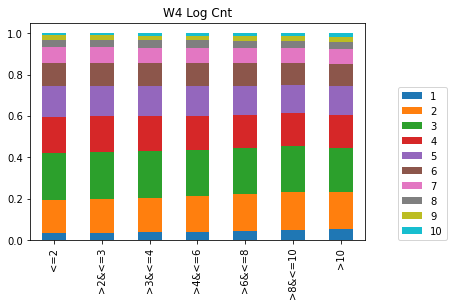

In [95]:
w0_df = temp_df1.loc[temp_df1['wd']==4, ['user_id', 'age', 'click_times']]
temp_df = w0_df

b20 = temp_df[temp_df['click_times']<=2]
b20 = b20.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20 = b20.rename(columns={'user_id': 'log_cnt'})
b20['log_cnt_pct'] = b20['log_cnt'] / b20['log_cnt'].sum()

b20 = b20[['age', 'log_cnt_pct']]
b20 = b20.set_index(['age'])
b20 = b20.unstack().unstack(1)
b20 = b20.reset_index(drop=True)
b20 = b20.rename(index={0: '<=2'})

# display(b20)

b20_t_30 = temp_df[(temp_df['click_times']>2) & (temp_df['click_times']<=3)]
b20_t_30 = b20_t_30.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20_t_30 = b20_t_30.rename(columns={'user_id': 'log_cnt'})
b20_t_30['log_cnt_pct'] = b20_t_30['log_cnt'] / b20_t_30['log_cnt'].sum()

b20_t_30 = b20_t_30[['age', 'log_cnt_pct']]
b20_t_30 = b20_t_30.set_index(['age'])
b20_t_30 = b20_t_30.unstack().unstack(1)
b20_t_30 = b20_t_30.reset_index(drop=True)
b20_t_30 = b20_t_30.rename(index={0: '>2&<=3'})

# display(b20_t_30)

b30_t_40 = temp_df[(temp_df['click_times']>3) & (temp_df['click_times']<=4)]
b30_t_40 = b30_t_40.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b30_t_40 = b30_t_40.rename(columns={'user_id': 'log_cnt'})
b30_t_40['log_cnt_pct'] = b30_t_40['log_cnt'] / b30_t_40['log_cnt'].sum()

b30_t_40 = b30_t_40[['age', 'log_cnt_pct']]
b30_t_40 = b30_t_40.set_index(['age'])
b30_t_40 = b30_t_40.unstack().unstack(1)
b30_t_40 = b30_t_40.reset_index(drop=True)
b30_t_40 = b30_t_40.rename(index={0: '>3&<=4'})

# display(b30_t_40)

b40_t_50 = temp_df[(temp_df['click_times']>4) & (temp_df['click_times']<=6)]
b40_t_50 = b40_t_50.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b40_t_50 = b40_t_50.rename(columns={'user_id': 'log_cnt'})
b40_t_50['log_cnt_pct'] = b40_t_50['log_cnt'] / b40_t_50['log_cnt'].sum()

b40_t_50 = b40_t_50[['age', 'log_cnt_pct']]
b40_t_50 = b40_t_50.set_index(['age'])
b40_t_50 = b40_t_50.unstack().unstack(1)
b40_t_50 = b40_t_50.reset_index(drop=True)
b40_t_50 = b40_t_50.rename(index={0: '>4&<=6'})

# display(b40_t_50)

b50_t_60 = temp_df[(temp_df['click_times']>6) & (temp_df['click_times']<=8)]
b50_t_60 = b50_t_60.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b50_t_60 = b50_t_60.rename(columns={'user_id': 'log_cnt'})
b50_t_60['log_cnt_pct'] = b50_t_60['log_cnt'] / b50_t_60['log_cnt'].sum()

b50_t_60 = b50_t_60[['age', 'log_cnt_pct']]
b50_t_60 = b50_t_60.set_index(['age'])
b50_t_60 = b50_t_60.unstack().unstack(1)
b50_t_60 = b50_t_60.reset_index(drop=True)
b50_t_60 = b50_t_60.rename(index={0: '>6&<=8'})

# display(b50_t_60)

b60_t_70 = temp_df[(temp_df['click_times']>8) & (temp_df['click_times']<=10)]
b60_t_70 = b60_t_70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b60_t_70 = b60_t_70.rename(columns={'user_id': 'log_cnt'})
b60_t_70['log_cnt_pct'] = b60_t_70['log_cnt'] / b60_t_70['log_cnt'].sum()

b60_t_70 = b60_t_70[['age', 'log_cnt_pct']]
b60_t_70 = b60_t_70.set_index(['age'])
b60_t_70 = b60_t_70.unstack().unstack(1)
b60_t_70 = b60_t_70.reset_index(drop=True)
b60_t_70 = b60_t_70.rename(index={0: '>8&<=10'})

# display(b60_t_70)

t70 = temp_df[temp_df['click_times']>10]
t70 = t70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
t70 = t70.rename(columns={'user_id': 'log_cnt'})
t70['log_cnt_pct'] = t70['log_cnt'] / t70['log_cnt'].sum()

t70 = t70[['age', 'log_cnt_pct']]
t70 = t70.set_index(['age'])
t70 = t70.unstack().unstack(1)
t70 = t70.reset_index(drop=True)
t70 = t70.rename(index={0: '>10'})

# display(t70)

temp_df = pd.concat([b20, b20_t_30, b30_t_40, b40_t_50, b50_t_60, b60_t_70, t70], axis=0)
display(temp_df, n=10)

temp_df.plot(kind='bar', stacked=True, legend=False, title='W4 Log Cnt')
plt.legend(loc=[1.1, 0])

age,1,2,3,4,5,6,7,8,9,10
<=2,0.033395,0.159654,0.230379,0.170519,0.147909,0.115119,0.075186,0.035600,0.021118,0.011122
>2&<=3,0.034641,0.162965,0.228051,0.171484,0.146737,0.113896,0.074288,0.035710,0.020833,0.011395
>3&<=4,0.037913,0.166907,0.226578,0.166877,0.145630,0.113159,0.074514,0.035488,0.020946,0.011986
>4&<=6,0.040950,0.169322,0.224882,0.165028,0.143159,0.111823,0.073854,0.035954,0.021884,0.013143
>6&<=8,0.045791,0.177550,0.221745,0.163337,0.139396,0.109951,0.071012,0.034880,0.022180,0.014158
>8&<=10,0.050738,0.181329,0.215825,0.159049,0.138243,0.109410,0.072106,0.034496,0.022935,0.015867
>10,0.054580,0.179300,0.213483,0.158066,0.139643,0.105436,0.069928,0.035158,0.024772,0.019635


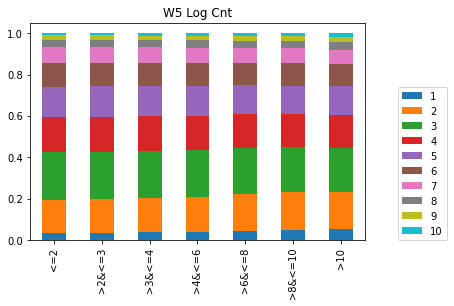

In [96]:
w0_df = temp_df1.loc[temp_df1['wd']==5, ['user_id', 'age', 'click_times']]
temp_df = w0_df

b20 = temp_df[temp_df['click_times']<=2]
b20 = b20.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20 = b20.rename(columns={'user_id': 'log_cnt'})
b20['log_cnt_pct'] = b20['log_cnt'] / b20['log_cnt'].sum()

b20 = b20[['age', 'log_cnt_pct']]
b20 = b20.set_index(['age'])
b20 = b20.unstack().unstack(1)
b20 = b20.reset_index(drop=True)
b20 = b20.rename(index={0: '<=2'})

# display(b20)

b20_t_30 = temp_df[(temp_df['click_times']>2) & (temp_df['click_times']<=3)]
b20_t_30 = b20_t_30.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20_t_30 = b20_t_30.rename(columns={'user_id': 'log_cnt'})
b20_t_30['log_cnt_pct'] = b20_t_30['log_cnt'] / b20_t_30['log_cnt'].sum()

b20_t_30 = b20_t_30[['age', 'log_cnt_pct']]
b20_t_30 = b20_t_30.set_index(['age'])
b20_t_30 = b20_t_30.unstack().unstack(1)
b20_t_30 = b20_t_30.reset_index(drop=True)
b20_t_30 = b20_t_30.rename(index={0: '>2&<=3'})

# display(b20_t_30)

b30_t_40 = temp_df[(temp_df['click_times']>3) & (temp_df['click_times']<=4)]
b30_t_40 = b30_t_40.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b30_t_40 = b30_t_40.rename(columns={'user_id': 'log_cnt'})
b30_t_40['log_cnt_pct'] = b30_t_40['log_cnt'] / b30_t_40['log_cnt'].sum()

b30_t_40 = b30_t_40[['age', 'log_cnt_pct']]
b30_t_40 = b30_t_40.set_index(['age'])
b30_t_40 = b30_t_40.unstack().unstack(1)
b30_t_40 = b30_t_40.reset_index(drop=True)
b30_t_40 = b30_t_40.rename(index={0: '>3&<=4'})

# display(b30_t_40)

b40_t_50 = temp_df[(temp_df['click_times']>4) & (temp_df['click_times']<=6)]
b40_t_50 = b40_t_50.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b40_t_50 = b40_t_50.rename(columns={'user_id': 'log_cnt'})
b40_t_50['log_cnt_pct'] = b40_t_50['log_cnt'] / b40_t_50['log_cnt'].sum()

b40_t_50 = b40_t_50[['age', 'log_cnt_pct']]
b40_t_50 = b40_t_50.set_index(['age'])
b40_t_50 = b40_t_50.unstack().unstack(1)
b40_t_50 = b40_t_50.reset_index(drop=True)
b40_t_50 = b40_t_50.rename(index={0: '>4&<=6'})

# display(b40_t_50)

b50_t_60 = temp_df[(temp_df['click_times']>6) & (temp_df['click_times']<=8)]
b50_t_60 = b50_t_60.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b50_t_60 = b50_t_60.rename(columns={'user_id': 'log_cnt'})
b50_t_60['log_cnt_pct'] = b50_t_60['log_cnt'] / b50_t_60['log_cnt'].sum()

b50_t_60 = b50_t_60[['age', 'log_cnt_pct']]
b50_t_60 = b50_t_60.set_index(['age'])
b50_t_60 = b50_t_60.unstack().unstack(1)
b50_t_60 = b50_t_60.reset_index(drop=True)
b50_t_60 = b50_t_60.rename(index={0: '>6&<=8'})

# display(b50_t_60)

b60_t_70 = temp_df[(temp_df['click_times']>8) & (temp_df['click_times']<=10)]
b60_t_70 = b60_t_70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b60_t_70 = b60_t_70.rename(columns={'user_id': 'log_cnt'})
b60_t_70['log_cnt_pct'] = b60_t_70['log_cnt'] / b60_t_70['log_cnt'].sum()

b60_t_70 = b60_t_70[['age', 'log_cnt_pct']]
b60_t_70 = b60_t_70.set_index(['age'])
b60_t_70 = b60_t_70.unstack().unstack(1)
b60_t_70 = b60_t_70.reset_index(drop=True)
b60_t_70 = b60_t_70.rename(index={0: '>8&<=10'})

# display(b60_t_70)

t70 = temp_df[temp_df['click_times']>10]
t70 = t70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
t70 = t70.rename(columns={'user_id': 'log_cnt'})
t70['log_cnt_pct'] = t70['log_cnt'] / t70['log_cnt'].sum()

t70 = t70[['age', 'log_cnt_pct']]
t70 = t70.set_index(['age'])
t70 = t70.unstack().unstack(1)
t70 = t70.reset_index(drop=True)
t70 = t70.rename(index={0: '>10'})

# display(t70)

temp_df = pd.concat([b20, b20_t_30, b30_t_40, b40_t_50, b50_t_60, b60_t_70, t70], axis=0)
display(temp_df, n=10)

temp_df.plot(kind='bar', stacked=True, legend=False, title='W5 Log Cnt')
plt.legend(loc=[1.1, 0])

age,1,2,3,4,5,6,7,8,9,10
<=2,0.031150,0.160114,0.231889,0.172324,0.147158,0.114432,0.075318,0.035530,0.021031,0.011053
>2&<=3,0.034964,0.165186,0.228137,0.170891,0.145812,0.113519,0.073530,0.035224,0.021357,0.011378
>3&<=4,0.039735,0.165319,0.224780,0.165369,0.146562,0.114368,0.073867,0.036898,0.020847,0.012256
>4&<=6,0.042464,0.169056,0.223642,0.164534,0.142329,0.112840,0.074183,0.035373,0.021882,0.013698
>6&<=8,0.049262,0.176258,0.218641,0.158293,0.142934,0.110161,0.072329,0.035971,0.022694,0.013457
>8&<=10,0.055302,0.177337,0.215219,0.161723,0.138315,0.106849,0.072556,0.034032,0.021888,0.016778
>10,0.058455,0.177492,0.209170,0.156265,0.140811,0.107777,0.071196,0.035374,0.024238,0.019224


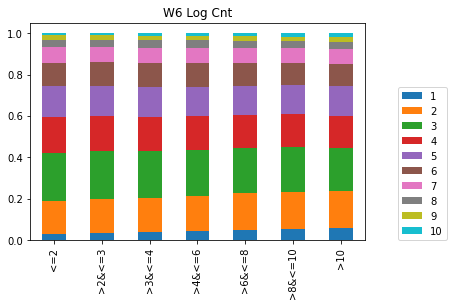

In [97]:
w0_df = temp_df1.loc[temp_df1['wd']==6, ['user_id', 'age', 'click_times']]
temp_df = w0_df

b20 = temp_df[temp_df['click_times']<=2]
b20 = b20.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20 = b20.rename(columns={'user_id': 'log_cnt'})
b20['log_cnt_pct'] = b20['log_cnt'] / b20['log_cnt'].sum()

b20 = b20[['age', 'log_cnt_pct']]
b20 = b20.set_index(['age'])
b20 = b20.unstack().unstack(1)
b20 = b20.reset_index(drop=True)
b20 = b20.rename(index={0: '<=2'})

# display(b20)

b20_t_30 = temp_df[(temp_df['click_times']>2) & (temp_df['click_times']<=3)]
b20_t_30 = b20_t_30.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20_t_30 = b20_t_30.rename(columns={'user_id': 'log_cnt'})
b20_t_30['log_cnt_pct'] = b20_t_30['log_cnt'] / b20_t_30['log_cnt'].sum()

b20_t_30 = b20_t_30[['age', 'log_cnt_pct']]
b20_t_30 = b20_t_30.set_index(['age'])
b20_t_30 = b20_t_30.unstack().unstack(1)
b20_t_30 = b20_t_30.reset_index(drop=True)
b20_t_30 = b20_t_30.rename(index={0: '>2&<=3'})

# display(b20_t_30)

b30_t_40 = temp_df[(temp_df['click_times']>3) & (temp_df['click_times']<=4)]
b30_t_40 = b30_t_40.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b30_t_40 = b30_t_40.rename(columns={'user_id': 'log_cnt'})
b30_t_40['log_cnt_pct'] = b30_t_40['log_cnt'] / b30_t_40['log_cnt'].sum()

b30_t_40 = b30_t_40[['age', 'log_cnt_pct']]
b30_t_40 = b30_t_40.set_index(['age'])
b30_t_40 = b30_t_40.unstack().unstack(1)
b30_t_40 = b30_t_40.reset_index(drop=True)
b30_t_40 = b30_t_40.rename(index={0: '>3&<=4'})

# display(b30_t_40)

b40_t_50 = temp_df[(temp_df['click_times']>4) & (temp_df['click_times']<=6)]
b40_t_50 = b40_t_50.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b40_t_50 = b40_t_50.rename(columns={'user_id': 'log_cnt'})
b40_t_50['log_cnt_pct'] = b40_t_50['log_cnt'] / b40_t_50['log_cnt'].sum()

b40_t_50 = b40_t_50[['age', 'log_cnt_pct']]
b40_t_50 = b40_t_50.set_index(['age'])
b40_t_50 = b40_t_50.unstack().unstack(1)
b40_t_50 = b40_t_50.reset_index(drop=True)
b40_t_50 = b40_t_50.rename(index={0: '>4&<=6'})

# display(b40_t_50)

b50_t_60 = temp_df[(temp_df['click_times']>6) & (temp_df['click_times']<=8)]
b50_t_60 = b50_t_60.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b50_t_60 = b50_t_60.rename(columns={'user_id': 'log_cnt'})
b50_t_60['log_cnt_pct'] = b50_t_60['log_cnt'] / b50_t_60['log_cnt'].sum()

b50_t_60 = b50_t_60[['age', 'log_cnt_pct']]
b50_t_60 = b50_t_60.set_index(['age'])
b50_t_60 = b50_t_60.unstack().unstack(1)
b50_t_60 = b50_t_60.reset_index(drop=True)
b50_t_60 = b50_t_60.rename(index={0: '>6&<=8'})

# display(b50_t_60)

b60_t_70 = temp_df[(temp_df['click_times']>8) & (temp_df['click_times']<=10)]
b60_t_70 = b60_t_70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b60_t_70 = b60_t_70.rename(columns={'user_id': 'log_cnt'})
b60_t_70['log_cnt_pct'] = b60_t_70['log_cnt'] / b60_t_70['log_cnt'].sum()

b60_t_70 = b60_t_70[['age', 'log_cnt_pct']]
b60_t_70 = b60_t_70.set_index(['age'])
b60_t_70 = b60_t_70.unstack().unstack(1)
b60_t_70 = b60_t_70.reset_index(drop=True)
b60_t_70 = b60_t_70.rename(index={0: '>8&<=10'})

# display(b60_t_70)

t70 = temp_df[temp_df['click_times']>10]
t70 = t70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
t70 = t70.rename(columns={'user_id': 'log_cnt'})
t70['log_cnt_pct'] = t70['log_cnt'] / t70['log_cnt'].sum()

t70 = t70[['age', 'log_cnt_pct']]
t70 = t70.set_index(['age'])
t70 = t70.unstack().unstack(1)
t70 = t70.reset_index(drop=True)
t70 = t70.rename(index={0: '>10'})

# display(t70)

temp_df = pd.concat([b20, b20_t_30, b30_t_40, b40_t_50, b50_t_60, b60_t_70, t70], axis=0)
display(temp_df, n=10)

temp_df.plot(kind='bar', stacked=True, legend=False, title='W6 Log Cnt')
plt.legend(loc=[1.1, 0])

### 点击相关的ad_info

In [9]:
grid_df = pd.concat([tr_log_df, tr_ad_df[['product_id', 'product_category', 'industry', 'ad_id', 'advertiser_id']], tr_user_df[['age']]], axis=1)

In [11]:
### product_id
temp_df = grid_df.groupby(['user_id']).agg({'product_id': 'nunique', 'age': 'first'}).reset_index()

temp_df = temp_df.rename(columns={'product_id': 'click_times'})

age,1,2,3,4,5,6,7,8,9,10
<=4,0.018186,0.136005,0.239743,0.187886,0.157636,0.122987,0.080183,0.034975,0.016122,0.006277
>4&<=6,0.028358,0.164098,0.237545,0.173303,0.145107,0.113362,0.075742,0.034941,0.019529,0.008014
>6&<=8,0.035178,0.169284,0.231477,0.164997,0.141533,0.112382,0.074866,0.037328,0.022107,0.010848
>8&<=10,0.040722,0.171826,0.221003,0.162502,0.142267,0.111264,0.076226,0.038059,0.023033,0.013099
>10&<=15,0.047772,0.173528,0.218211,0.159687,0.141201,0.111202,0.073309,0.036402,0.023898,0.014791
>15&<=20,0.054273,0.176728,0.214667,0.158260,0.141716,0.109945,0.069675,0.034301,0.023808,0.016626
>20,0.053553,0.171670,0.211612,0.162678,0.146825,0.109229,0.067537,0.032127,0.023398,0.021370


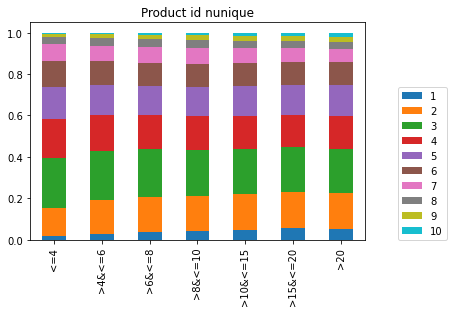

In [29]:
b20 = temp_df[temp_df['click_times']<=4]
b20 = b20.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20 = b20.rename(columns={'user_id': 'log_cnt'})
b20['log_cnt_pct'] = b20['log_cnt'] / b20['log_cnt'].sum()

b20 = b20[['age', 'log_cnt_pct']]
b20 = b20.set_index(['age'])
b20 = b20.unstack().unstack(1)
b20 = b20.reset_index(drop=True)
b20 = b20.rename(index={0: '<=4'})

# display(b20)

b20_t_30 = temp_df[(temp_df['click_times']>4) & (temp_df['click_times']<=6)]
b20_t_30 = b20_t_30.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20_t_30 = b20_t_30.rename(columns={'user_id': 'log_cnt'})
b20_t_30['log_cnt_pct'] = b20_t_30['log_cnt'] / b20_t_30['log_cnt'].sum()

b20_t_30 = b20_t_30[['age', 'log_cnt_pct']]
b20_t_30 = b20_t_30.set_index(['age'])
b20_t_30 = b20_t_30.unstack().unstack(1)
b20_t_30 = b20_t_30.reset_index(drop=True)
b20_t_30 = b20_t_30.rename(index={0: '>4&<=6'})

# display(b20_t_30)

b30_t_40 = temp_df[(temp_df['click_times']>6) & (temp_df['click_times']<=8)]
b30_t_40 = b30_t_40.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b30_t_40 = b30_t_40.rename(columns={'user_id': 'log_cnt'})
b30_t_40['log_cnt_pct'] = b30_t_40['log_cnt'] / b30_t_40['log_cnt'].sum()

b30_t_40 = b30_t_40[['age', 'log_cnt_pct']]
b30_t_40 = b30_t_40.set_index(['age'])
b30_t_40 = b30_t_40.unstack().unstack(1)
b30_t_40 = b30_t_40.reset_index(drop=True)
b30_t_40 = b30_t_40.rename(index={0: '>6&<=8'})

# display(b30_t_40)

b40_t_50 = temp_df[(temp_df['click_times']>8) & (temp_df['click_times']<=10)]
b40_t_50 = b40_t_50.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b40_t_50 = b40_t_50.rename(columns={'user_id': 'log_cnt'})
b40_t_50['log_cnt_pct'] = b40_t_50['log_cnt'] / b40_t_50['log_cnt'].sum()

b40_t_50 = b40_t_50[['age', 'log_cnt_pct']]
b40_t_50 = b40_t_50.set_index(['age'])
b40_t_50 = b40_t_50.unstack().unstack(1)
b40_t_50 = b40_t_50.reset_index(drop=True)
b40_t_50 = b40_t_50.rename(index={0: '>8&<=10'})

# display(b40_t_50)

b50_t_60 = temp_df[(temp_df['click_times']>10) & (temp_df['click_times']<=15)]
b50_t_60 = b50_t_60.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b50_t_60 = b50_t_60.rename(columns={'user_id': 'log_cnt'})
b50_t_60['log_cnt_pct'] = b50_t_60['log_cnt'] / b50_t_60['log_cnt'].sum()

b50_t_60 = b50_t_60[['age', 'log_cnt_pct']]
b50_t_60 = b50_t_60.set_index(['age'])
b50_t_60 = b50_t_60.unstack().unstack(1)
b50_t_60 = b50_t_60.reset_index(drop=True)
b50_t_60 = b50_t_60.rename(index={0: '>10&<=15'})

# display(b50_t_60)

b60_t_70 = temp_df[(temp_df['click_times']>15) & (temp_df['click_times']<=20)]
b60_t_70 = b60_t_70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b60_t_70 = b60_t_70.rename(columns={'user_id': 'log_cnt'})
b60_t_70['log_cnt_pct'] = b60_t_70['log_cnt'] / b60_t_70['log_cnt'].sum()

b60_t_70 = b60_t_70[['age', 'log_cnt_pct']]
b60_t_70 = b60_t_70.set_index(['age'])
b60_t_70 = b60_t_70.unstack().unstack(1)
b60_t_70 = b60_t_70.reset_index(drop=True)
b60_t_70 = b60_t_70.rename(index={0: '>15&<=20'})

# display(b60_t_70)

t70 = temp_df[temp_df['click_times']>20]
t70 = t70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
t70 = t70.rename(columns={'user_id': 'log_cnt'})
t70['log_cnt_pct'] = t70['log_cnt'] / t70['log_cnt'].sum()

t70 = t70[['age', 'log_cnt_pct']]
t70 = t70.set_index(['age'])
t70 = t70.unstack().unstack(1)
t70 = t70.reset_index(drop=True)
t70 = t70.rename(index={0: '>20'})

# display(t70)

temp_df = pd.concat([b20, b20_t_30, b30_t_40, b40_t_50, b50_t_60, b60_t_70, t70], axis=0)
display(temp_df, n=10)

temp_df.plot(kind='bar', stacked=True, legend=False, title='Product id nunique')
plt.legend(loc=[1.1, 0])

In [38]:
### advertiser_id
temp_df = grid_df.groupby(['user_id']).agg({'advertiser_id': 'nunique', 'age': 'first'}).reset_index()

temp_df = temp_df.rename(columns={'advertiser_id': 'click_times'})

age,1,2,3,4,5,6,7,8,9,10
<=4,0.020690,0.121317,0.229781,0.186520,0.171787,0.120063,0.077429,0.039498,0.023824,0.009091
>4&<=6,0.023879,0.142053,0.228004,0.182552,0.156095,0.122651,0.076996,0.036565,0.020758,0.010447
>6&<=8,0.025305,0.145647,0.237220,0.180130,0.152148,0.115901,0.075596,0.036799,0.021077,0.010177
>8&<=10,0.026701,0.152489,0.235612,0.177885,0.149564,0.115748,0.075278,0.034871,0.021792,0.010060
>10&<=15,0.030998,0.157144,0.232345,0.171543,0.148704,0.115682,0.074874,0.036720,0.020969,0.011022
>15&<=20,0.037751,0.169953,0.225540,0.166101,0.144365,0.112095,0.075264,0.035665,0.021245,0.012020
>20,0.050135,0.176718,0.217104,0.160169,0.140760,0.110306,0.072604,0.034680,0.022236,0.015289


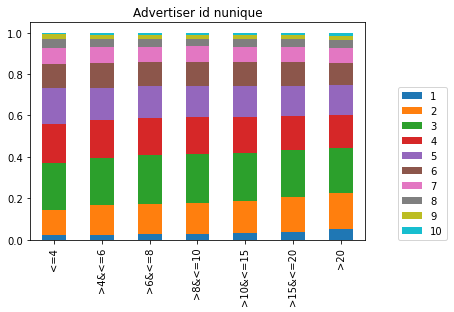

In [39]:
b20 = temp_df[temp_df['click_times']<=4]
b20 = b20.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20 = b20.rename(columns={'user_id': 'log_cnt'})
b20['log_cnt_pct'] = b20['log_cnt'] / b20['log_cnt'].sum()

b20 = b20[['age', 'log_cnt_pct']]
b20 = b20.set_index(['age'])
b20 = b20.unstack().unstack(1)
b20 = b20.reset_index(drop=True)
b20 = b20.rename(index={0: '<=4'})

# display(b20)

b20_t_30 = temp_df[(temp_df['click_times']>4) & (temp_df['click_times']<=6)]
b20_t_30 = b20_t_30.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20_t_30 = b20_t_30.rename(columns={'user_id': 'log_cnt'})
b20_t_30['log_cnt_pct'] = b20_t_30['log_cnt'] / b20_t_30['log_cnt'].sum()

b20_t_30 = b20_t_30[['age', 'log_cnt_pct']]
b20_t_30 = b20_t_30.set_index(['age'])
b20_t_30 = b20_t_30.unstack().unstack(1)
b20_t_30 = b20_t_30.reset_index(drop=True)
b20_t_30 = b20_t_30.rename(index={0: '>4&<=6'})

# display(b20_t_30)

b30_t_40 = temp_df[(temp_df['click_times']>6) & (temp_df['click_times']<=8)]
b30_t_40 = b30_t_40.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b30_t_40 = b30_t_40.rename(columns={'user_id': 'log_cnt'})
b30_t_40['log_cnt_pct'] = b30_t_40['log_cnt'] / b30_t_40['log_cnt'].sum()

b30_t_40 = b30_t_40[['age', 'log_cnt_pct']]
b30_t_40 = b30_t_40.set_index(['age'])
b30_t_40 = b30_t_40.unstack().unstack(1)
b30_t_40 = b30_t_40.reset_index(drop=True)
b30_t_40 = b30_t_40.rename(index={0: '>6&<=8'})

# display(b30_t_40)

b40_t_50 = temp_df[(temp_df['click_times']>8) & (temp_df['click_times']<=10)]
b40_t_50 = b40_t_50.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b40_t_50 = b40_t_50.rename(columns={'user_id': 'log_cnt'})
b40_t_50['log_cnt_pct'] = b40_t_50['log_cnt'] / b40_t_50['log_cnt'].sum()

b40_t_50 = b40_t_50[['age', 'log_cnt_pct']]
b40_t_50 = b40_t_50.set_index(['age'])
b40_t_50 = b40_t_50.unstack().unstack(1)
b40_t_50 = b40_t_50.reset_index(drop=True)
b40_t_50 = b40_t_50.rename(index={0: '>8&<=10'})

# display(b40_t_50)

b50_t_60 = temp_df[(temp_df['click_times']>10) & (temp_df['click_times']<=15)]
b50_t_60 = b50_t_60.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b50_t_60 = b50_t_60.rename(columns={'user_id': 'log_cnt'})
b50_t_60['log_cnt_pct'] = b50_t_60['log_cnt'] / b50_t_60['log_cnt'].sum()

b50_t_60 = b50_t_60[['age', 'log_cnt_pct']]
b50_t_60 = b50_t_60.set_index(['age'])
b50_t_60 = b50_t_60.unstack().unstack(1)
b50_t_60 = b50_t_60.reset_index(drop=True)
b50_t_60 = b50_t_60.rename(index={0: '>10&<=15'})

# display(b50_t_60)

b60_t_70 = temp_df[(temp_df['click_times']>15) & (temp_df['click_times']<=20)]
b60_t_70 = b60_t_70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b60_t_70 = b60_t_70.rename(columns={'user_id': 'log_cnt'})
b60_t_70['log_cnt_pct'] = b60_t_70['log_cnt'] / b60_t_70['log_cnt'].sum()

b60_t_70 = b60_t_70[['age', 'log_cnt_pct']]
b60_t_70 = b60_t_70.set_index(['age'])
b60_t_70 = b60_t_70.unstack().unstack(1)
b60_t_70 = b60_t_70.reset_index(drop=True)
b60_t_70 = b60_t_70.rename(index={0: '>15&<=20'})

# display(b60_t_70)

t70 = temp_df[temp_df['click_times']>20]
t70 = t70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
t70 = t70.rename(columns={'user_id': 'log_cnt'})
t70['log_cnt_pct'] = t70['log_cnt'] / t70['log_cnt'].sum()

t70 = t70[['age', 'log_cnt_pct']]
t70 = t70.set_index(['age'])
t70 = t70.unstack().unstack(1)
t70 = t70.reset_index(drop=True)
t70 = t70.rename(index={0: '>20'})

# display(t70)

temp_df = pd.concat([b20, b20_t_30, b30_t_40, b40_t_50, b50_t_60, b60_t_70, t70], axis=0)
display(temp_df, n=10)

temp_df.plot(kind='bar', stacked=True, legend=False, title='Advertiser id nunique')
plt.legend(loc=[1.1, 0])

In [40]:
### industry
temp_df = grid_df.groupby(['user_id']).agg({'industry': 'nunique', 'age': 'first'}).reset_index()

temp_df = temp_df.rename(columns={'industry': 'click_times'})

age,1,2,3,4,5,6,7,8,9,10
<=4,0.021700,0.097321,0.186267,0.176888,0.183879,0.152696,0.093410,0.043435,0.026476,0.017928
>4&<=6,0.028535,0.130880,0.219387,0.179235,0.163988,0.124445,0.078788,0.037215,0.023342,0.014184
>6&<=8,0.030627,0.152707,0.230424,0.175378,0.152749,0.115565,0.073914,0.035751,0.021140,0.011745
>8&<=10,0.033274,0.161757,0.235125,0.171710,0.146469,0.113333,0.072563,0.034396,0.020106,0.011268
>10&<=15,0.041080,0.174935,0.228545,0.167152,0.140567,0.109356,0.072270,0.033868,0.020542,0.011686
>15&<=20,0.047955,0.183784,0.224629,0.158337,0.135738,0.106739,0.073051,0.035139,0.022057,0.012571
>20,0.054303,0.189293,0.215814,0.151614,0.131903,0.106482,0.073379,0.037392,0.023586,0.016234


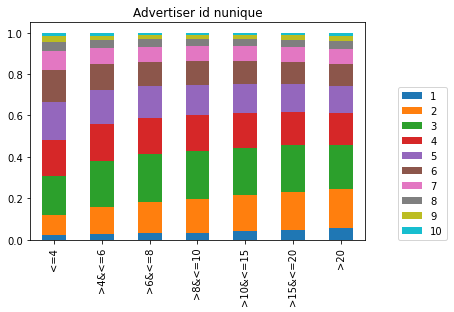

In [41]:
b20 = temp_df[temp_df['click_times']<=4]
b20 = b20.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20 = b20.rename(columns={'user_id': 'log_cnt'})
b20['log_cnt_pct'] = b20['log_cnt'] / b20['log_cnt'].sum()

b20 = b20[['age', 'log_cnt_pct']]
b20 = b20.set_index(['age'])
b20 = b20.unstack().unstack(1)
b20 = b20.reset_index(drop=True)
b20 = b20.rename(index={0: '<=4'})

# display(b20)

b20_t_30 = temp_df[(temp_df['click_times']>4) & (temp_df['click_times']<=6)]
b20_t_30 = b20_t_30.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b20_t_30 = b20_t_30.rename(columns={'user_id': 'log_cnt'})
b20_t_30['log_cnt_pct'] = b20_t_30['log_cnt'] / b20_t_30['log_cnt'].sum()

b20_t_30 = b20_t_30[['age', 'log_cnt_pct']]
b20_t_30 = b20_t_30.set_index(['age'])
b20_t_30 = b20_t_30.unstack().unstack(1)
b20_t_30 = b20_t_30.reset_index(drop=True)
b20_t_30 = b20_t_30.rename(index={0: '>4&<=6'})

# display(b20_t_30)

b30_t_40 = temp_df[(temp_df['click_times']>6) & (temp_df['click_times']<=8)]
b30_t_40 = b30_t_40.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b30_t_40 = b30_t_40.rename(columns={'user_id': 'log_cnt'})
b30_t_40['log_cnt_pct'] = b30_t_40['log_cnt'] / b30_t_40['log_cnt'].sum()

b30_t_40 = b30_t_40[['age', 'log_cnt_pct']]
b30_t_40 = b30_t_40.set_index(['age'])
b30_t_40 = b30_t_40.unstack().unstack(1)
b30_t_40 = b30_t_40.reset_index(drop=True)
b30_t_40 = b30_t_40.rename(index={0: '>6&<=8'})

# display(b30_t_40)

b40_t_50 = temp_df[(temp_df['click_times']>8) & (temp_df['click_times']<=10)]
b40_t_50 = b40_t_50.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b40_t_50 = b40_t_50.rename(columns={'user_id': 'log_cnt'})
b40_t_50['log_cnt_pct'] = b40_t_50['log_cnt'] / b40_t_50['log_cnt'].sum()

b40_t_50 = b40_t_50[['age', 'log_cnt_pct']]
b40_t_50 = b40_t_50.set_index(['age'])
b40_t_50 = b40_t_50.unstack().unstack(1)
b40_t_50 = b40_t_50.reset_index(drop=True)
b40_t_50 = b40_t_50.rename(index={0: '>8&<=10'})

# display(b40_t_50)

b50_t_60 = temp_df[(temp_df['click_times']>10) & (temp_df['click_times']<=15)]
b50_t_60 = b50_t_60.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b50_t_60 = b50_t_60.rename(columns={'user_id': 'log_cnt'})
b50_t_60['log_cnt_pct'] = b50_t_60['log_cnt'] / b50_t_60['log_cnt'].sum()

b50_t_60 = b50_t_60[['age', 'log_cnt_pct']]
b50_t_60 = b50_t_60.set_index(['age'])
b50_t_60 = b50_t_60.unstack().unstack(1)
b50_t_60 = b50_t_60.reset_index(drop=True)
b50_t_60 = b50_t_60.rename(index={0: '>10&<=15'})

# display(b50_t_60)

b60_t_70 = temp_df[(temp_df['click_times']>15) & (temp_df['click_times']<=20)]
b60_t_70 = b60_t_70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
b60_t_70 = b60_t_70.rename(columns={'user_id': 'log_cnt'})
b60_t_70['log_cnt_pct'] = b60_t_70['log_cnt'] / b60_t_70['log_cnt'].sum()

b60_t_70 = b60_t_70[['age', 'log_cnt_pct']]
b60_t_70 = b60_t_70.set_index(['age'])
b60_t_70 = b60_t_70.unstack().unstack(1)
b60_t_70 = b60_t_70.reset_index(drop=True)
b60_t_70 = b60_t_70.rename(index={0: '>15&<=20'})

# display(b60_t_70)

t70 = temp_df[temp_df['click_times']>20]
t70 = t70.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()
t70 = t70.rename(columns={'user_id': 'log_cnt'})
t70['log_cnt_pct'] = t70['log_cnt'] / t70['log_cnt'].sum()

t70 = t70[['age', 'log_cnt_pct']]
t70 = t70.set_index(['age'])
t70 = t70.unstack().unstack(1)
t70 = t70.reset_index(drop=True)
t70 = t70.rename(index={0: '>20'})

# display(t70)

temp_df = pd.concat([b20, b20_t_30, b30_t_40, b40_t_50, b50_t_60, b60_t_70, t70], axis=0)
display(temp_df, n=10)

temp_df.plot(kind='bar', stacked=True, legend=False, title='Industry nunique')
plt.legend(loc=[1.1, 0])

### 重复点击 log 行数

In [45]:
grid_df = pd.concat([tr_user_df[['user_id', 'age']], tr_log_df[['creative_id', 'click_times']]], axis=1)

In [19]:
print('total click log: ', len(grid_df))
print('重复点击行数: ', len(grid_df) - len(grid_df.drop_duplicates(subset=['user_id', 'creative_id'])))

total click log:  30082771
重复点击行数:  2473903


In [46]:
temp_df = grid_df[grid_df.duplicated(subset=['user_id', 'creative_id'])]

In [48]:
temp_df = temp_df.drop_duplicates(subset=['user_id', 'creative_id'], keep='first')

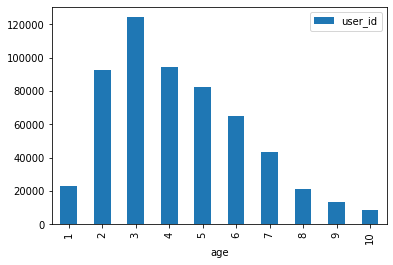

In [51]:
temp_df.groupby(['age']).agg({'user_id': 'nunique'}).reset_index().plot(x='age', y='user_id', kind='bar')

### 每天用户平均 log row count

In [8]:
grid_df = pd.concat([tr_user_df[['user_id', 'age']], tr_log_df[['creative_id', 'time']]], axis=1)

In [12]:
temp_df = grid_df.groupby(['user_id', 'time']).agg({'age': 'first', 'creative_id': 'count'}).reset_index()

In [13]:
temp_df = temp_df.groupby(['age', 'time']).agg({'creative_id': 'mean'}).reset_index()

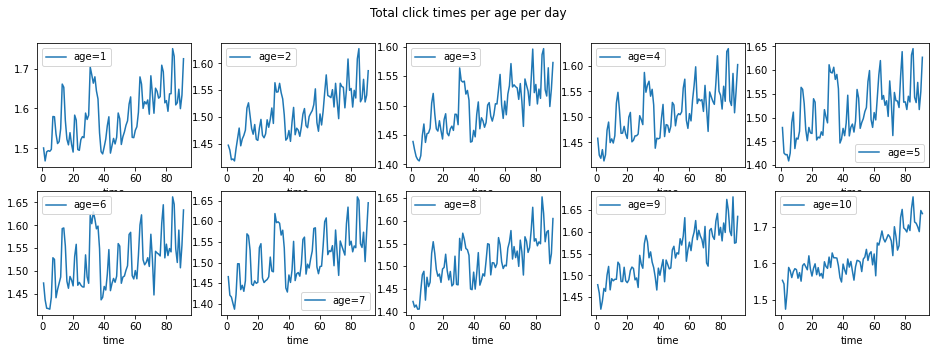

In [16]:
plt.figure(figsize=(16, 5))
c_names = ['black', 'blue', 'green', 'red', 'yellow',
           'orange', 'hotpink', 'olive', 'purple', 'wheat']
for i in range(1, 11):
    ax = plt.subplot(2, 5, i)
    temp_df[temp_df['age']==i].plot(x='time',y='creative_id', label='age='+str(i), kind='line', ax=ax)

plt.suptitle('Total click times per age per day')
plt.legend(loc='best')    
plt.show()

### 每天点击的人数分布年龄段

In [66]:
temp_df = grid_df.groupby(['age', 'time']).agg({'user_id': 'nunique'}).reset_index()

In [67]:
temp_df = pd.pivot(temp_df, index='time', columns='age', values='user_id')

In [71]:
temp_df = temp_df.div(temp_df.sum(axis=1), axis='rows')

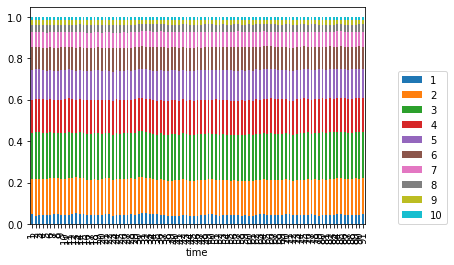

In [72]:
temp_df.plot(kind='bar', stacked=True, legend=False)
plt.legend(loc=[1.1, 0])

### Week Feature

In [16]:
tr_log_df['wd'] = tr_log_df['time'] % 7

In [17]:
temp_df = pd.concat([tr_log_df, tr_user_df[['age']]], axis=1)

In [6]:
temp_df = temp_df.groupby(['age', 'wd']).agg({'user_id': 'count'}).reset_index()

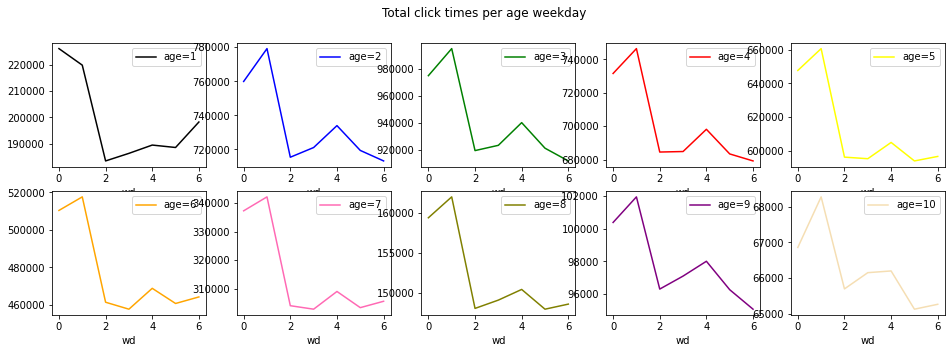

In [7]:
plt.figure(figsize=(16, 5))
c_names = ['black', 'blue', 'green', 'red', 'yellow',
           'orange', 'hotpink', 'olive', 'purple', 'wheat']
for i in range(1, 11):
    ax = plt.subplot(2, 5, i)
    temp_df[temp_df['age']==i].plot(x='wd',y='user_id', c=c_names[i-1], label='age='+str(i), kind='line', ax=ax)

plt.suptitle('Total click times per age weekday')
plt.legend(loc='best')    
plt.show()

In [24]:
temp1_df = temp_df.groupby(['age', 'wd']).agg({'user_id': 'nunique'}).reset_index()

In [19]:
temp2_df = temp_df.groupby(['age']).agg({'user_id': 'nunique'}).reset_index()

In [27]:
for i in range(1, 11):
    temp1_df.loc[temp1_df['age']==i, 'user_id'] = temp1_df.loc[temp1_df['age']==i, 'user_id']/temp2_df.loc[temp2_df['age']==i, 'user_id'].values[0]

In [29]:
temp_df = temp1_df

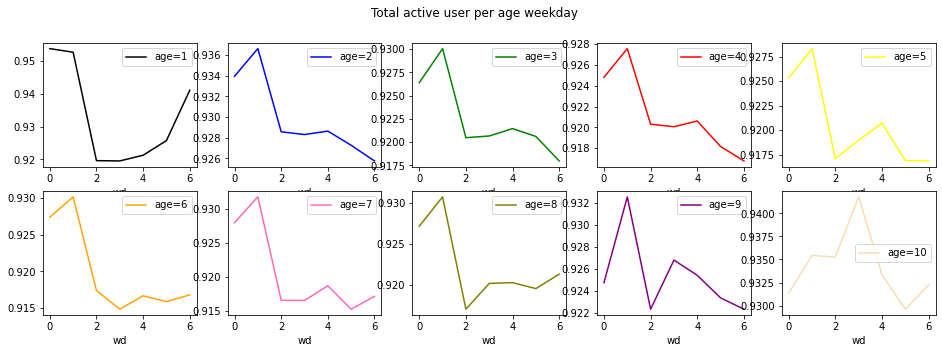

In [32]:
plt.figure(figsize=(16, 5))
c_names = ['black', 'blue', 'green', 'red', 'yellow',
           'orange', 'hotpink', 'olive', 'purple', 'wheat']
for i in range(1, 11):
    ax = plt.subplot(2, 5, i)
    temp_df[temp_df['age']==i].plot(x='wd',y='user_id', c=c_names[i-1], label='age='+str(i), kind='line', ax=ax)

plt.suptitle('Total active user per age weekday')
plt.legend(loc='best')    
plt.show()

### 

### Per day click count

In [5]:
temp_df = tr_log_df.groupby(['user_id', 'time']).agg({'creative_id': 'count'}).reset_index()

In [11]:
temp_df.groupby(['user_id'])['creative_id'].quantile(0.9).quantile(0.6)

2.0